In [0]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
      print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving IND115datalabels.csv to IND115datalabels.csv
User uploaded file "IND115datalabels.csv" with length 157565 bytes


In [0]:
data=pd.read_csv('IND115datalabels.csv')
n=data.values.shape[0]
print(data.values.shape)
print(data.head(5))

(8760, 3)
    Vol A   Vol B  labels
0  6512.0  2525.0     1.0
1  6565.0  2599.0     1.0
2  6489.0  2698.0     1.0
3  6472.0  2650.0     1.0
4  6526.0  2651.0     1.0


In [0]:
normalval=data.values[data.values[:,2]==1,:]
ind=np.where(data.values[:,2]==1)
normalval[1:15,:]
print(normalval.shape)
print(ind)

(8129, 3)
(array([   0,    1,    2, ..., 8757, 8758, 8759]),)


In [0]:
labelstrue=data.values[:,2]

y=normalval[:,1]
X=ind[0]

In [0]:
# PolynomialFeatures (prepreprocessing)
poly = PolynomialFeatures(degree=5)
xpoly = poly.fit_transform(X.reshape(-1,1))

# fit with linear regression
model=LinearRegression()
model.fit(xpoly,y)
ypoly=model.predict(xpoly)

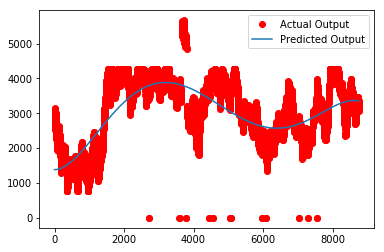

In [0]:
#plotting
plt.plot(range(0,n),data.values[:,1],'ro',label='Actual Output')
plt.plot(X,ypoly,label='Predicted Output')
plt.legend()
plt.show()

In [0]:
#labelling
thresh = 3*metrics.mean_squared_error(y,ypoly)  


i=np.array(range(0,n))
itransf=poly.fit_transform(i.reshape(-1,1))
ypred=model.predict(itransf)

labelspred=np.ones((n,),dtype=bool)

for i in range(0,n):
  if metrics.mean_squared_error([ypred[i]],[data.values[i,1]])>thresh:
    print(i)
    labelspred[i]=0

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
52
115
116
117
118
122
123
124
125
126
127
128
129
130
131
132
133
947
948
949
950
951
952
953
954
955
956
957
958
959
960
961
962
963
964
965
966
967
968
969
970
971
972
973
974
975
976
977
978
979
980
981
982
983
984
985
986
987
988
989
1015
1016
1017
1018
1239
1240
1241
1243
1245
1246
1247
1248
1249
1250
1251
1252
1253
1254
1255
1256
1257
1258
1259
1260
1261
1262
1263
1264
1265
1266
1267
1268
1269
1270
1271
1272
1273
1274
1276
1280
1281
1282
1285
1286
1287
1288
1289
1290
1291
1292
1293
1298
1299
1300
1301
1302
1303
1477
1478
1479
1480
1481
1482
1483
1484
1485
1486
1487
1488
1489
1490
1491
1492
1499
1500
1501
1502
1503
1504
1505
1506
1507
1508
1510
1511
1512
1513
1514
1515
1516
1517
1518
1519
1520
1521
1522
1523
1524
1525
1526
1527
1528
1529
1530
1531
1532
1533
1534
1535
1536
1537
1538
1539
1540
1541
1542
1543
1544
1545
1546
1547
1548
1549
1550
1551
1552
1553
1

In [0]:
#metrics
print("Accuracy score ",metrics.accuracy_score(labelstrue, labelspred, normalize=True))
print("Precision score ",metrics.precision_score(labelstrue,labelspred,average=None))
print("Recall score ",metrics.recall_score(labelstrue, labelspred, average=None))
print("f1 score ",metrics.f1_score(labelstrue, labelspred, average=None))

Accuracy score  0.905365296803653
Precision score  [0.38380282 0.96155792]
Recall score  [0.51822504 0.93541641]
f1 score  [0.44099798 0.94830704]
